<a href="https://colab.research.google.com/github/vaibhav-1707/Gaumak_protfolio/blob/main/placement_project_logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import the required libraries

In [ ]:
df=pd.read_csv('/content/placement.csv')

Read CSV file as dataframes (df)

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


Check for preview.

In [ ]:
df.shape

(100, 4)

Check for the shape of the data in the CSV file.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


Check for the info of the dataset.

In [ ]:
#Preprocessing

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

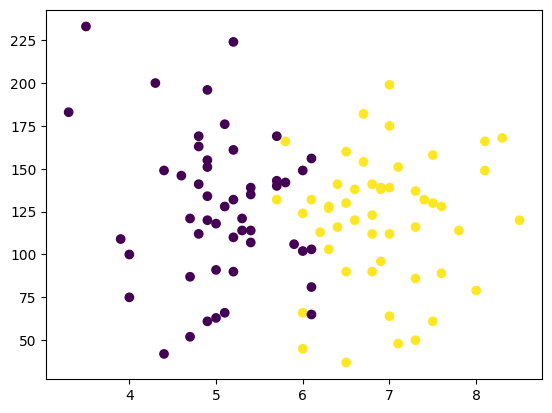

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

Plot data points in the given dataset.

In [ ]:
X = df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
X #2D tensor (Matrix)

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y #1D tensor (Vector)

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
75,4.8,169.0
66,6.9,96.0
5,7.1,48.0
74,6.7,154.0
39,4.6,146.0
...,...,...
33,6.0,149.0
95,4.3,200.0
15,5.1,176.0
41,5.4,114.0


In [ ]:
y_train

,placement
75,0
66,1
5,1
74,1
39,0
...,...
33,0
95,0
15,0
41,0


In [ ]:
X_test

,cgpa,iq
29,7.0,112.0
84,5.7,169.0
7,5.0,63.0
62,6.0,102.0
91,7.5,158.0
81,5.4,107.0
40,4.9,134.0
8,6.1,156.0
87,5.7,132.0
78,6.1,81.0


In [ ]:
y_test

,placement
29,1
84,0
7,0
62,0
91,1
81,0
40,0
8,0
87,1
78,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-1.02168139,  1.1174149 ],
       [ 0.77124138, -0.6881473 ],
       [ 0.94199593, -1.87536628],
       [ 0.60048683,  0.74640897],
       [-1.19243594,  0.54853914],
       [ 0.42973228, -0.83654967],
       [-0.76554957,  0.10333202],
       [ 0.17360046, -0.26767391],
       [-1.36319049, -2.02376866],
       [ 1.28350503, -1.55382781],
       [-1.02168139, -0.29240764],
       [ 0.42973228,  0.89481135],
       [-0.68017229,  0.91954507],
       [ 0.85661866,  1.85942677],
       [ 1.11275048,  0.32593558],
       [ 0.51510956, -0.09453781],
       [ 1.11275048, -1.82589883],
       [-1.70469959, -1.20755561],
       [-0.93630412,  0.7711427 ],
       [-0.93630412,  1.78522558],
       [ 2.13727778, -0.09453781],
       [ 1.96652323,  1.09268118],
       [-0.25328592,  0.40013677],
       [ 0.77124138,  0.37540304],
       [ 1.28350503,  0.15279948],
       [-1.10705867, -0.06980408],
       [-0.85092684, -0.81181594],
       [-0.59479502, -0.06980408],
       [ 1.36888231,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.85661866, -0.29240764],
       [-0.25328592,  1.1174149 ],
       [-0.85092684, -1.50436035],
       [ 0.00284591, -0.53974493],
       [ 1.28350503,  0.84534389],
       [-0.50941774, -0.41607628],
       [-0.93630412,  0.2517344 ],
       [ 0.08822318,  0.79587643],
       [-0.25328592,  0.20226694],
       [ 0.08822318, -1.05915323]])

In [ ]:
#Train the model using Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

,placement
29,1
84,0
7,0
62,0
91,1
81,0
40,0
8,0
87,1
78,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.6

In [ ]:
#Plot decision boundary

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

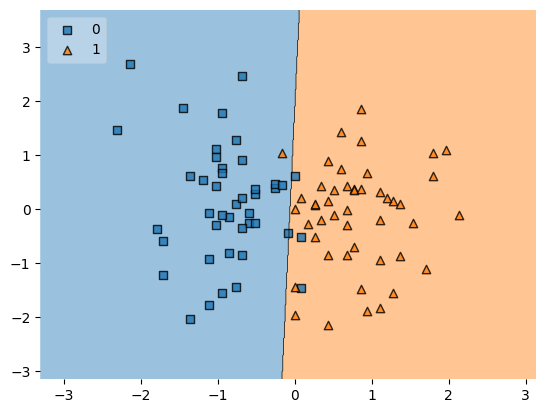

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))